# Logistic Regression -Breast Cancer dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [8]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Response is in target and target_names<br>
Predictors are in data and feature_names

### Response (target)

In [9]:
cancer.target[:5]

array([0, 0, 0, 0, 0])

In [10]:
# 1 is for benign tumor, 0 for malign tumor

In [11]:
n = len(cancer.target)
n

569

In [12]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [13]:
cancer.target.shape

(569,)

In [14]:
# count rows by category

In [15]:
df = pd.DataFrame(cancer.target,columns = ['tumor'])

In [16]:
pd.value_counts(df.tumor)

1    357
0    212
Name: tumor, dtype: int64

In [17]:
# fraction of rows by category

In [18]:
pd.value_counts(df.tumor,normalize=True)

1    0.627417
0    0.372583
Name: tumor, dtype: float64

In [ ]:
# 212 patients with cancer tumor

### predictors (features) names

In [19]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [20]:
type(cancer.data)

numpy.ndarray

In [21]:
cancer.data.shape

(569, 30)

In [22]:
# Create DataFrame with the 30 predictors

In [23]:
list1 = list(cancer.feature_names)
df0 = pd.DataFrame(cancer.data,columns = list1)
df0[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
# describe the scaling per feature

In [25]:
df0.describe().iloc[3:,:]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
min,6.981,9.71,43.79,143.5,0.05263,0.01938,0.00000,0.00000,0.1060,0.04996,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.0000,0.00000,0.1565,0.05504
25%,11.700,16.17,75.17,420.3,0.08637,0.06492,0.02956,0.02031,0.1619,0.05770,...,13.01,21.08,84.11,515.3,0.11660,0.14720,0.1145,0.06493,0.2504,0.07146
50%,13.370,18.84,86.24,551.1,0.09587,0.09263,0.06154,0.03350,0.1792,0.06154,...,14.97,25.41,97.66,686.5,0.13130,0.21190,0.2267,0.09993,0.2822,0.08004
75%,15.780,21.80,104.10,782.7,0.10530,0.13040,0.13070,0.07400,0.1957,0.06612,...,18.79,29.72,125.40,1084.0,0.14600,0.33910,0.3829,0.16140,0.3179,0.09208
max,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.42680,0.20120,0.3040,0.09744,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.2520,0.29100,0.6638,0.20750


In [26]:
df0.shape

(569, 30)

In [27]:
# plot feature values

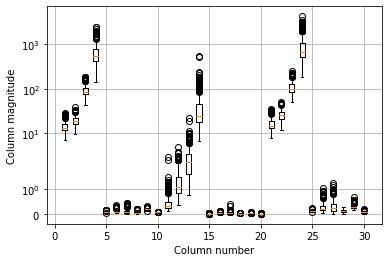

In [28]:
plt.boxplot(cancer.data, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Column number")
plt.ylabel("Column magnitude")
plt.grid();

In [29]:
# 1st try no preprocessing

## Validation Approach

In [30]:
# split dataset

In [31]:
y = cancer.target
X = cancer.data

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,
                                                 random_state=66)

In [68]:
print(len(X_train),
      len(X_test))

426 143


## Preprocessing -predictors only-

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
# Find min/max of each feature in Train set

In [36]:
scaler.fit(X_train);

In [37]:
# Now transform data into (0,1) 
# substracting the train set Min, 
# dividing by the train set range

In [38]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model = LogisticRegression(solver = 'lbfgs',max_iter = 10000).fit(X,y)
model.coef_

array([[ 1.04416478,  0.17898383, -0.27990407,  0.02266274, -0.17006924,
        -0.23359807, -0.53158508, -0.28025859, -0.25813621, -0.03334163,
        -0.0773966 ,  1.26133937,  0.11350693, -0.10833712, -0.0234327 ,
         0.04709577, -0.05336947, -0.03659769, -0.04004551,  0.01069554,
         0.16582275, -0.43557953, -0.10345568, -0.01409449, -0.33754995,
        -0.73599929, -1.42645241, -0.57099767, -0.72018236, -0.10256733]])

In [41]:
model.intercept_

array([27.71390837])

### Holdout Cross Validation with Regularization

In [69]:
model = LogisticRegression(solver = 'lbfgs',max_iter=10000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9440559440559441

In [70]:
# Scaled data and regularization

In [71]:
model = LogisticRegression(solver = 'lbfgs',max_iter=10000,C=1)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.972027972027972

In [72]:
model = LogisticRegression(solver = 'lbfgs',max_iter=10000,C=1e20)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled,y_test)

0.9440559440559441

In [73]:
pd.crosstab(yhat,y_test,
            rownames=['predictions'],colnames=['y_test'])

y_test,0,1
predictions,,
0,48,3
1,5,87


In [74]:
# Search for the best C value

In [75]:
model = LogisticRegression(solver = 'lbfgs',max_iter=1000)

In [83]:
arates = []
Cvalues = np.arange(0.01,1.50,0.001)
len(Cvalues)

1490

In [85]:
for i in Cvalues:
    model.set_params(C = i)
    model.fit(X_train_scaled,y_train)
    arate = model.score(X_test_scaled,y_test)
    arates.append(arate)

In [90]:
arates[:9]

[0.7972027972027972,
 0.7972027972027972,
 0.8041958041958042,
 0.8041958041958042,
 0.8181818181818182,
 0.8391608391608392,
 0.8531468531468531,
 0.8531468531468531,
 0.8531468531468531]

In [89]:
df2 = pd.DataFrame(arates,
                   columns = ['Test accuracy']) 
df2.index = Cvalues
df2.index.name = 'C values'
df2.head(9)

,Test accuracy
C values,
0.010,0.797203
0.011,0.797203
0.012,0.804196
0.013,0.804196
0.014,0.818182
0.015,0.839161
0.016,0.853147
0.017,0.853147
0.018,0.853147


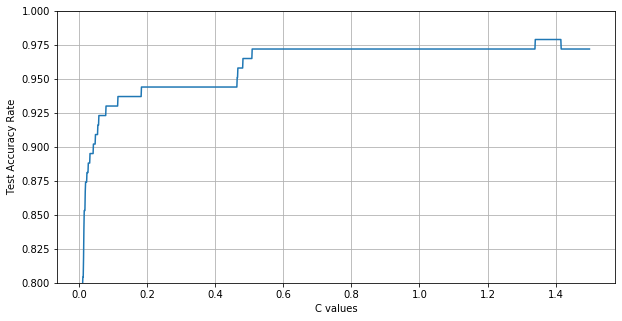

In [53]:
df2.plot(figsize = (10,5),grid=True,legend = False,ylim = (0.80,1.0))
plt.ylabel('Test Accuracy Rate');

In [54]:
best_row = arates.index(max(arates))
best_row

1330

In [55]:
arates[best_row]

0.9790209790209791

In [56]:
best_Cvalue = Cvalues[best_row]
best_Cvalue

1.339999999999999

### Stratified K-fold Cross Validation

In [57]:
# Not Scaling each fold

In [58]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state=1)
model1 = LogisticRegression(solver = 'lbfgs',max_iter = 10000)
scores = cross_val_score(model1,X,y,cv=kfold)
scores

array([0.94736842, 0.94736842, 0.93859649, 0.95614035, 0.96460177])

In [59]:
scores.mean()

0.9508150908244062

In [60]:
# Scaling each fold

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [62]:
kfold = StratifiedKFold(n_splits = 5,shuffle = True,random_state=1)
scaler = MinMaxScaler()
model1 = LogisticRegression(solver = 'lbfgs')
pipe1 = Pipeline([('transformer1', scaler), ('estimator1', model1)])
scores = cross_val_score(pipe1,X,y,cv=kfold)
scores

array([0.94736842, 0.98245614, 0.96491228, 0.96491228, 0.95575221])

In [63]:
scores.mean()

0.9630802670392795